7.23 Fitting a periodic Poisson distribution to data

(a) $\lambda_t=N_t$

(b)

(c) $\sum N_t / 24$

(d)(e)

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
rhos = np.array([.1,1,10,100])
N = np.array([0,4,2,2,3,0,4,5,6,6,4,1,4,4,0,1,3,4,2,0,3,2,0,1])
N_test = np.array([0,1,3,2,3,1,4,5,3,1,4,3,5,5,2,1,1,1,2,0,1,2,1,0])

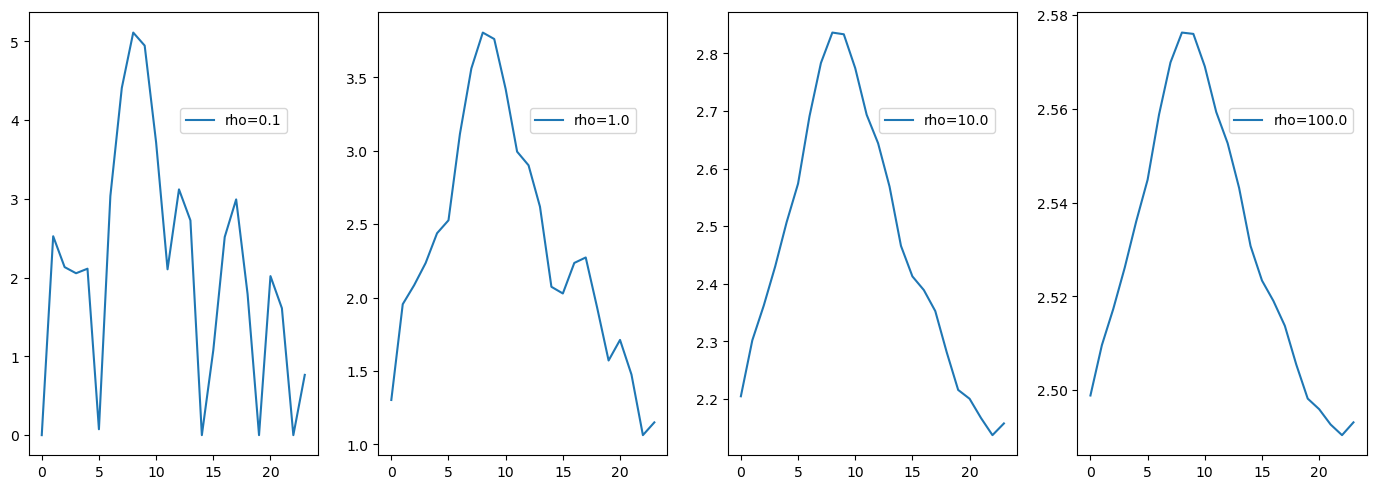

In [28]:
Lambda = cp.Variable(24, nonneg=True)
lambdas = []
for rho in rhos:
    objective = cp.Maximize(
        - cp.sum(Lambda) + N @ cp.log(Lambda)
        - rho * cp.sum_squares(Lambda - Lambda[list(range(1,24))+[0]])
    )
    constraints = []
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    lambdas.append(Lambda.value)
fig, axs = plt.subplots(1, len(rhos),figsize=(14, 5))
for i in range(len(rhos)):
    axs[i].plot(lambdas[i],label=f'rho={rhos[i]}')
    axs[i].legend( bbox_to_anchor=(0.5, 0.8))
plt.tight_layout()
plt.show()

In [29]:
def log_likelihood(data, lambdas):
    from scipy.stats import poisson
    return np.sum(poisson.logpmf(data, lambdas))
for i, rho in enumerate(rhos):
    print(f'rho={rho}', log_likelihood(N_test, lambdas[i]))

rho=0.1 -85.08239177211874
rho=1.0 -37.74828636372021
rho=10.0 -41.71489840256759
rho=100.0 -43.76226951257012


$\rho=1$